# CSC3831 Final Assessment - Part I: Data Engineering



In [1]:
# Loading in standard packages for analysis, feel free to add an extra packages you'd like to use here
import random
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
# Loading in the corrupted dataset to be used in analysis and imputation
houses_corrupted = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MAR.csv', header=0)
# Remove an artifact from the dataset
houses_corrupted.drop(["Unnamed: 0"], axis=1, inplace=True)

Above we've loaded in a corrupted version of a housing dataset. The anomalies need to be dealt with and missing values imputed.

### 1. Data Understanding [7]
- Perform ad hoc EDA to understand and describe what you see in the raw dataset
  - Include graphs, statistics, and written descriptions as appropriate
  - Any extra information about the data you can provide here is useful, think about performing an analysis (ED**A**), what would you find interesting or useful?
- Identify features with missing records, outlier records


##Taking a First Look at the Data
I am starting my exploratory data analysis by examining the first 10 rows of the `houses_corrupted` dataset using the `.head()` method. This gives me a quick overview of the data, allowing me to see the format, structure, and types of values in each column.

In [6]:
houses_corrupted.head(10)

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,NaN,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,NaN,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
5,269700.0,4.0368,52.0,919.0,213.0,413.0,193.0,37.85,-122.25
6,299200.0,3.6591,52.0,2535.0,489.0,1094.0,514.0,37.84,-122.25
7,241400.0,3.1200,52.0,3104.0,687.0,1157.0,647.0,37.84,-122.25
8,226700.0,2.0804,42.0,2555.0,665.0,1206.0,595.0,37.84,-122.26
9,261100.0,3.6912,52.0,3549.0,707.0,1551.0,714.0,37.84,-122.25


From examining the first 10 rows of the dataset, it is evident that there are missing values, particularly in columns like `population` (for example, rows 2 and 3 show `NaN` values). I will now use the `info()` method to understand the data types of each column and obtain an initial count of non-null values, which will provide further insight into the extent of missing data.

In [7]:
houses_corrupted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       18576 non-null  float64
 2   housing_median_age  18576 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          18576 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Following the initial inspection using `info()`, I observed missing values in columns like `median_income`, `housing_median_age`, and `population`, as these columns show 18,576 non-null counts out of a total of 20,640 entries. To quantify these missing values more precisely, I will use `isnull()` and `sum()` to count the exact number of missing values in each column.

In [10]:
# Missing values detection
missing_data = houses_corrupted.isnull().sum()
missing_percentage = (missing_data / houses_corrupted.shape[0]) * 100
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_info)

                    Missing Values  Percentage
median_house_value               0         0.0
median_income                 2064        10.0
housing_median_age            2064        10.0
total_rooms                      0         0.0
total_bedrooms                   0         0.0
population                    2064        10.0
households                       0         0.0
latitude                         0         0.0
longitude                        0         0.0


From the results, it is evident that `median_income`, `housing_median_age`, and `population` each have 2064 missing entries, which accounts for approximately 10% of the dataset.

## Visualizing Relationships, Distributions and Statistical Summaries

Since the `houses_corrupted` dataset consists entirely of numerical values, I generated a pair plot using the `sns.pairplot` function to examine the center, spread, and skew of data. The pair plot enables us to visually explore the distributions and pairwise relationships between attributes, helping to identify trends, clusters, or unusual patterns that could impact the data analysis.

In [ ]:
sns.pairplot(houses_corrupted)

Due to large volume of data points, it is challenging to determine the skew for each attribute directly from the pair plot alone. The dense overlapping points make it difficult to discern finer details in data distribution. To address this, I created a density plot for each attribute using the `sns.kdeplot` function, which provides a clearer view of the skewness of the data and distribution shape.

In [ ]:
sns.kdeplot(houses_corrupted['median_house_value'])

In [ ]:
sns.kdeplot(houses_corrupted['median_income'])

In [ ]:
sns.kdeplot(houses_corrupted['housing_median_age'])

In [ ]:
sns.kdeplot(houses_corrupted['total_rooms'])

In [ ]:
sns.kdeplot(houses_corrupted['total_bedrooms'])

In [ ]:
sns.kdeplot(houses_corrupted['population'])

In [ ]:
sns.kdeplot(houses_corrupted['households'])

In [ ]:
sns.kdeplot(houses_corrupted['latitude'])

In [ ]:
sns.kdeplot(houses_corrupted['longitude'])

The density plots show that `median_house_value`, `median_income`, `total_rooms`, `total_bedrooms`, `population`, and `households` are all right-skewed with the majority of values clustered at lower ranges and a long tail extending to higher values. This right-skewness suggests a high concentration of data points at the lower end of each variable's range, with fewer outliers on the higher end.

Furthermore, the density plot for `housing_median_age` shows multiple peaks, indicating a multimodal distribution rather than a simple skew. Unlike other variables, `housing_median_age` does not display a strong right or left skew but instead has several prominent peaks, showing varying concentrations of housing ages across different ranges.

Additionally, the `latitude` and `longitude` plots display bimodal distributions, each with two distinct peaks. This indicates that there are two main clusters of data points in these attributes.

Next, I used the `describe` method to view the summary statistics of the numeric values.

In [16]:
houses_corrupted.describe()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,18576.000000,18576.000000,20640.000000,20640.000000,18576.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.929958,28.324182,2635.763081,537.898014,1488.069283,499.539680,35.631861,-119.569704
std,115395.615874,1.964296,12.584914,2181.615252,421.247906,1170.585810,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.560300,18.000000,1447.750000,295.000000,839.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.572400,28.000000,2127.000000,435.000000,1227.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.870050,37.000000,3148.000000,647.000000,1803.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


At first glance at the DataFrame output, we see that `median_house_value` has a maximum value of 500,001, while its mean is only 206,855. Since the mean is sensitive to outliers, this large gap between the mean and maximum suggests that the maximum value is likely an outlier. Similarly, the `median_income` has a maximum of 15.00 compared to a mean of 3.93, indicating potential outliers at the high end. For `total_rooms`, the maximum of 39,320 is significantly higher than the mean of 2,635, indicating to high outliers in this feature. The same pattern is observed with `total_bedrooms`, `population`, and `households`, where each maximum value greatly exceeds the mean, suggesting the presence of outliers in these variables.

For `housing_median_age`, the maximum value is 52, while the mean is 28.32. The values are spread relatively even across its range, suggesting minimal outliers. `latitude` and `longitude` are within typical geographic boundaries, showing no extreme values. Together, these features exhibit distributions that appear consistent and without significant outliers.

From the previous density plots, we observed that none of the attributes in the dataset follow a normal distribution. Therefore, the mean and standard deviation provided in this statistical summary may not be the most appropriate measures for these skewed distributions. A more suitable approach is to use the **median (50th percentile)** and the **median absolute deviation (MAD)**, as these are more reliable for skewed data. Since the MAD function is deprecated in Python, I will use the formula from Practical 1 to calculate it.

In [11]:
houses_corrupted.columns[:-1]

houses_MAD = pd.DataFrame(columns=houses_corrupted.columns[:-1])
mads = []

# Calculate MAD
for attribute in houses_corrupted.columns[:-1]:
    mad = 1.483 * abs(houses_corrupted[attribute] - houses_corrupted[attribute].median()).median()
    mads.append(mad)

# Create a new DataFrame with the calculated MAD values
houses_MAD.loc[0] = mads

print(houses_MAD)


   median_house_value  median_income  housing_median_age  total_rooms  \
0            101437.2       1.660515              13.347     1181.951   

   total_bedrooms  population  households  latitude  
0         241.729     670.316     223.933   1.82409  


## Understanding Relationships Between Attributes

Next, I aim to explore the relationships between attributes in the dataset to identify any significant correlations. By using `.corr()` method, I can calculate the correlation coefficients between pairs of numerical attributes, which will help me understand the strength and direction of these relationships. Since all attributes in the dataset are numerical, there is no need to remove any non-numerical columns for this analysis.

In [18]:
houses_corrupted.corr()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
median_house_value,1.000000,0.694887,0.097929,0.134153,0.050594,-0.027855,0.065843,-0.144160,-0.045967
median_income,0.694887,1.000000,-0.120147,0.198818,-0.009499,0.006298,0.012754,-0.096861,-0.008902
housing_median_age,0.097929,-0.120147,1.000000,-0.372323,-0.329757,-0.305052,-0.312948,0.011372,-0.106438
total_rooms,0.134153,0.198818,-0.372323,1.000000,0.929893,0.857515,0.918484,-0.036100,0.044568
total_bedrooms,0.050594,-0.009499,-0.329757,0.929893,1.000000,0.877178,0.979829,-0.066318,0.068378
population,-0.027855,0.006298,-0.305052,0.857515,0.877178,1.000000,0.907096,-0.107525,0.099797
households,0.065843,0.012754,-0.312948,0.918484,0.979829,0.907096,1.000000,-0.071035,0.055310
latitude,-0.144160,-0.096861,0.011372,-0.036100,-0.066318,-0.107525,-0.071035,1.000000,-0.924664
longitude,-0.045967,-0.008902,-0.106438,0.044568,0.068378,0.099797,0.055310,-0.924664,1.000000


From the correlation coefficients, I can identify various types of correlations among the attributes in the dataset:

1) Positive Strong Correlations:
*   `total_rooms` vs `total_bedrooms`: Houses with more rooms tends to have more bedrooms.
*   `population` vs `households`: Population increases as households increases. This relationship could aid data imputation, especially since `population` has missing values.
*   `total_rooms` vs `households`: House with more rooms tends to have more households.
*   `population` vs `total_rooms`: Higher population are usually found in houses with more total rooms.
*   `median_income` vs `median_house_value`: Higher median income has a higher median house value. This can be useful when imputing missing `median_income` values.

2) Weak Positive Correlation:
*   `median_income` vs `total_rooms`: There is a slight positive correlation between income and the total number of rooms, but the relationship is weak.

3) Negative Strong Correlation:
*   `latitude` vs `longitude`: A strong negative correlation between these attributes suggests that as latitude increases, longitude decreases, showing an inverse relationship.

4) Negative Weak Correlations:
*   `latitude` vs `median_house_value`
*   `latitude` vs `median_income`

A weak negative correlation suggests that as one variable increases, the other decreases slightly, though they do not have a strong cause-effect relationship.


It is also worth noting that `housing_median_age` shows weak correlations with most other attributes, indicating that the age of housing does not have a strong relationship with any attributes in the dataset.










### 2. Outlier Identification [10]
- Utilise a statistical outlier detection approach (i.e., **no** KNN, LOF, 1Class SVM)
- Utilise an algorithmic outlier detection method of your choice
- Compare results and decide what to do with identified outliers
  - Include graphs, statistics, and written descriptions as appropriate
- Explain what you are doing, and why your analysis is appropriate
- Comment on benefits/detriments of statistical and algorithmic outlier detection approaches


## Statistical Outlier Detection Using the Interquartile Range (IQR) Method


To detect outliers in this dataset, I used a statistical method called the **Interquartile Range (IQR)**, rather than the Z-score. Based on the density plots for each attribute from the previous section of the EDA, it is clear that the data does not follow a normal distribution, making Z-score less appropriate. The IQR method is more suitable for skewed data, as it focuses on the median and quartiles, rather than the mean and standard deviation, which are more sensitive to extreme values.

The IQR method is simple to calculate and easy to interpret. In this approach, data points that fall below Q1 - 1.5 x IQR or above Q3 + 1.5 x IQR are considered outliers, where Q1 and Q3 represent the 25th and 75th percentiles of the data, respectively. This approach allows me to detect anomalies without letting them overly influence the analysis, making it a reliable choice for identifying outliers in skewed data.

In [3]:
# Outlier Detection using IQR with accurate counting
outliers = pd.DataFrame()
outlier_counts = {}

for column in houses_corrupted.select_dtypes(include=[np.number]).columns:
    Q1 = houses_corrupted[column].quantile(0.25)
    Q3 = houses_corrupted[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove NaNs before calculating outliers
    column_data = houses_corrupted[column].dropna()
    outliers[column] = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

    # Count the outliers for each column
    outlier_counts[column] = outliers[column].notna().sum()

# Print outlier counts for each column
print("Outliers Count per Column:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")


Outliers Count per Column:
median_house_value: 1071 outliers
median_income: 406 outliers
housing_median_age: 0 outliers
total_rooms: 81 outliers
total_bedrooms: 61 outliers
population: 28 outliers
households: 62 outliers
latitude: 0 outliers
longitude: 0 outliers



From the results, we can see that certain columns, such as `median_house_value`, `median_income`, `total_rooms`, `total_bedrooms`, `population`, and `households`, contain outliers. Other columns like `housing_median_age`, `latitude`, and `longitude`, show no outliers. This outcome aligns with my initial hypothesis from the statistical summary generated using the `.describe()` method, where I noted that attributes like `median_house_value` likely contain outliers due to the large gap between the mean and maximum values. Similarly, features like `housing_median_age` appear consistent and without extreme values, resulting in no outliers.

It is important to note that I removed `NaN` values before calculating outliers (as shown in the code). This is done to ensure that missing values do not interfere with the calculations, which could result in inaccurate identification of outliers.

## Algorithmic Outlier Detection Using Isolation Forest

Another approach to detect outliers is to use an algorithmic method. I chose **Isolation Forest**, an anomaly detection algorithm that identifies outliers by isolating data points that are unusual or different from the rest. This approach is particularly suitable for this dataset because it does not assume any specific data distribution, making it flexible for handling various distributions, such as right-skewed or multimodal distributions, which are present in this dataset.

The Isolation Forest algorithm identifies complex outliers by analyzing multiple features together. Unlike the IQR method, it can detect anomalies that may not be extreme in any single dimension but are unusual in a multi-dimensional context. For example, a combination of `median_house_value` and `median_income` might reveal anomalies that would not be evident when examining these variables individually.

In [4]:
from sklearn.ensemble import IsolationForest

# Drop rows with NaN values
houses_cleaned = houses_corrupted.dropna()

iso_forest = IsolationForest(contamination=0.1  , random_state=42)
outliers_iforest = iso_forest.fit_predict(houses_cleaned.select_dtypes(include=[np.number]))

# Calculate anomaly scores before modifying the dataset
anomaly_scores = iso_forest.decision_function(houses_cleaned.select_dtypes(include=[np.number]))

# Add the outliers label and anomaly scores to the dataset
houses_cleaned = houses_cleaned.copy()
houses_cleaned['Outlier_IForest'] = outliers_iforest
houses_cleaned['Anomaly_Score'] = anomaly_scores

# Finding outliers
outliers_count = np.sum(outliers_iforest == -1)
print(f"Isolation Forest detected {outliers_count} outliers")

houses_cleaned[['Outlier_IForest', 'Anomaly_Score']].head(10)


Isolation Forest detected 1506 outliers


,Outlier_IForest,Anomaly_Score
0,1,0.002869
1,-1,-0.035216
4,1,0.063364
5,1,0.053759
6,1,0.077851
7,1,0.070509
8,1,0.089521
9,1,0.060924
11,1,0.058856
12,1,0.087060


Since Isolation Forest cannot handle missing values, I first removed rows with missing data using `.dropna()` to ensure a complete dataset. I set the contamination parameter to 0.1, expecting 10% of data points to be outliers. This choice aligns with prior observations from density plots and the IQR method. The density plots suggests that features like `median_house_values` and `median_income` showed right-skewed with potential extreme values. Similarly, the IQR method also identified outliers in several features, indicating that a notable but limited percentage of data points might be outliers. Setting contamination to 10% allows us to capture a moderate number of anomalies without being too strict about it.

From the results, Isolation Forest identified 1,506 outliers, with `Outlier_IForest` labeling inliers as 1 and outliers as -1. The `Anomaly_Score` provides a ranking of these outliers, where lower scores indicate stronger anomalies.

In the displayed table, we see both inliers and outliers with their respective anomaly scores. For instance, row 1 has an anomaly score of -0.035, indicating a stronger outlier compared to other values. This score ranking can help us evaluate which outliers are severe enough for potential removal or require handling, such as capping extreme values, while minor anomalies may still contribute meaningful data to the analysis.

## Comparison of Statistical and Algorithmic Outlier Detection Results

Comparing the results of the statistical outlier detection (IQR) and algorithmic detection (Isolation Forest) methods, we see that each approach identifies different sets of outliers.

The IQR method identifies outliers based on individual feature distributions, flagging extreme values within each column independently. On the other hand, Isolation Forest is a multivariate approach that detected 1506 outliers across multiple features by considering patterns and interactions between columns. Additionally, it provides an anomaly score for each data point, allowing us to rank outliers by severity, where negative scores indicating a higher likelihood of being an outlier.

To better understand the comparison, we can visualize the results for each method. This will highlight how the IQR method, which identifies outliers in a univariate context, differs from the multivariate approach of Isolation Forest.

### Identifying Univariate Outliers with Box Plots (IQR Method)

For the IQR method, we can use box plots to identify univariate outliers. In a box plot, values outside the whiskers are considered outliers.

In [ ]:
# Plot boxplots for IQR-identified outliers in key columns
outlier_columns = ['median_house_value', 'median_income', 'total_rooms', 'total_bedrooms', 'population', 'households']
for col in outlier_columns:
    sns.boxplot(x=houses_corrupted[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

Based on the box plots for all the columns with outliers, we can clearly see that the outliers, which are located outside the whiskers of each plot. All of these outliers are located beyond 1.5 times the interquartile range (IQR) above the upper quartile, indicating values that are significantly higher than the majority of data points in each attribute. This pattern suggests that these extreme values are unusual or anomalous, especially in distributions that are right-skewed, like `median_house_value` and `median_income`.

### Identifying Multivariate Outliers with Isolation Forest Pair Plot

For the Isolation Forest method, I used a pair plot to display each attribute plotted against all other attributes in the dataset. This approach allows us to observe multivariate relationships and see how each pair of feature interacts.

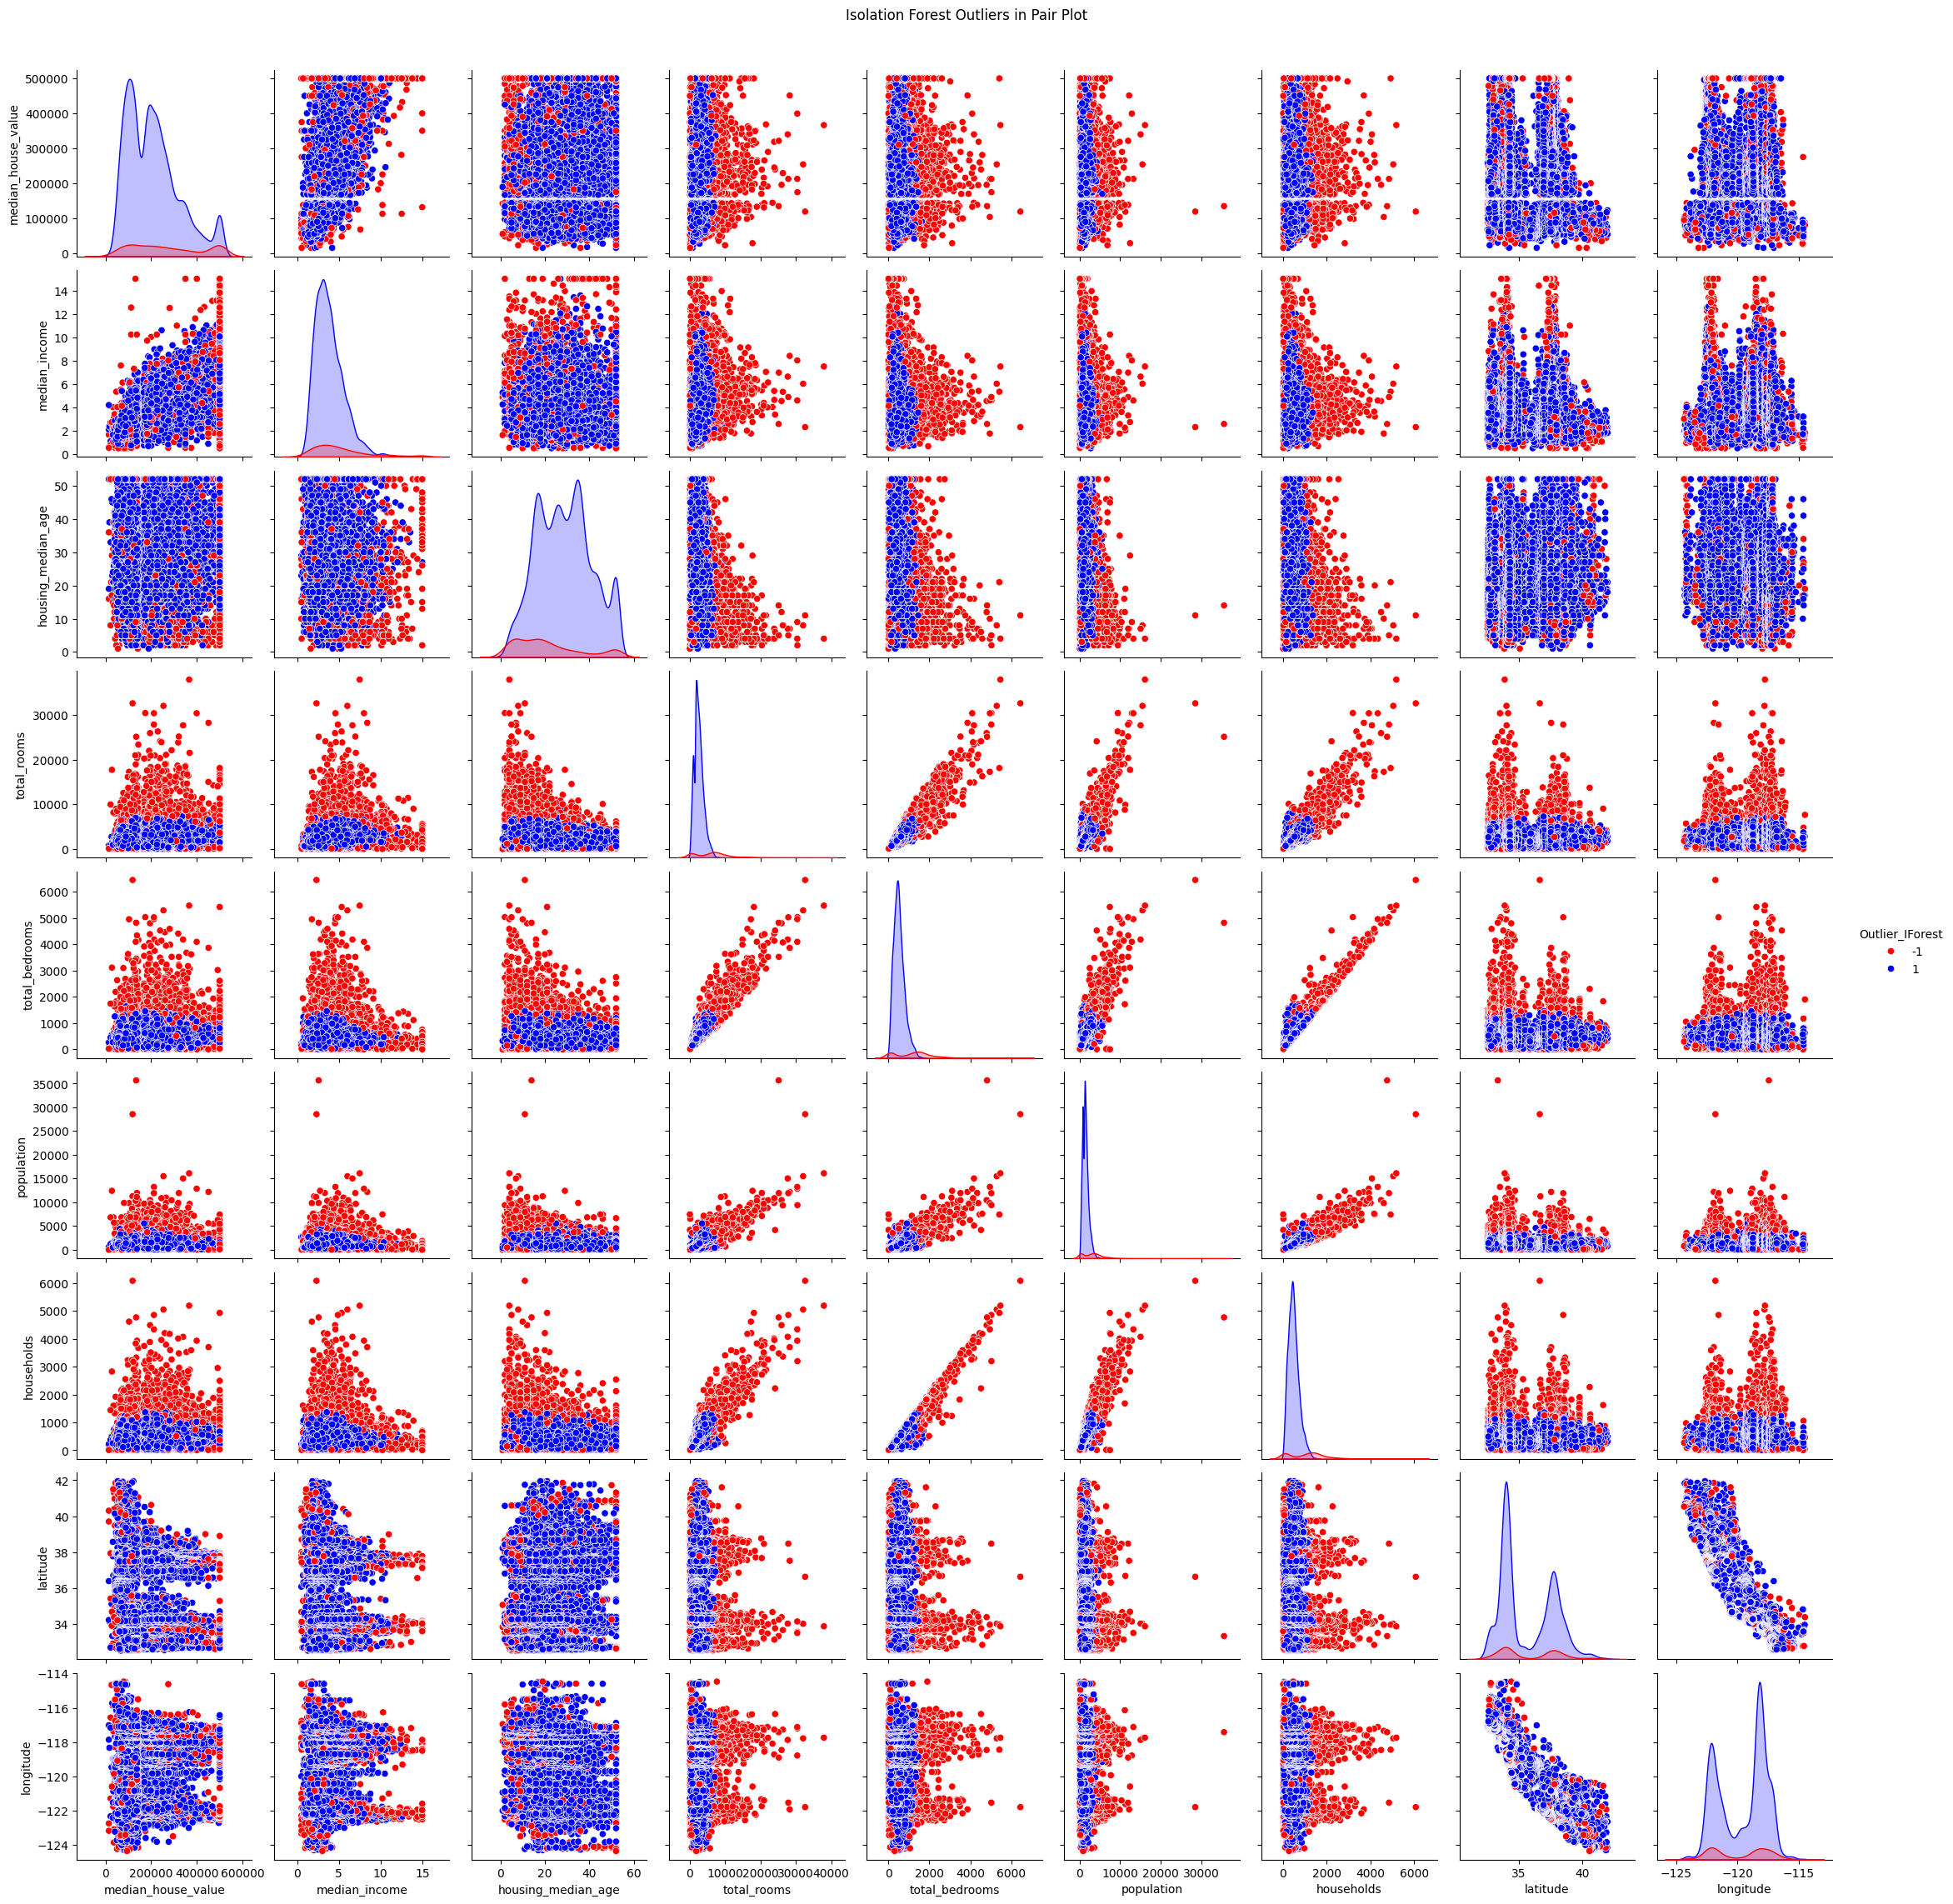

In [6]:
# Select only the columns you want to plot, excluding "Anomaly Score"
columns_to_plot = houses_cleaned.drop(columns=['Anomaly_Score'])

# Visualize Isolation Forest Outliers using a pair plot
sns.pairplot(columns_to_plot, hue='Outlier_IForest', palette={1: 'blue', -1: 'red'})
plt.suptitle("Isolation Forest Outliers in Pair Plot", y=1.02)
plt.show()


In this plot, outliers detected by Isolation Forest are highlighted in red, while normal points (inliers) are shown in blue. The diagonal y=x line represents the same attribute plotted against itself. These diagonal plots display the distribution of each individual feature, which explains why they typically appear as histograms or density plots along the diagonal line.

In this plot, outliers detected by Isolation Forest are highlighted in red, while normal points (inliers) are shown in blue. The diagonal y=x line represents the same attribute plotted against itself, displaying the distribution of each individual feature, often as histograms or density plots along this line. We can observe that many red points (outliers) cluster in regions where data points diverge from typical patterns across multiple dimensions. This highlights the effectiveness of Isolation Forest in identifying anomalies that may go unnoticed in single-variable analysis, providing a more comprehensive understanding of the dataset's structure and unusual data points.

### 3. Imputation [10]
- Identify which features should be imputed and which should be removed
  - Provide a written rationale for this decision
- Impute the missing records using KNN imputation
- Impute the missing records using MICE imputation
- Compare both imputed datasets feature distributions against each other and the non-imputed data
- Build a regressor on all thre datasets
  - Use regression models to predict house median price
  - Compare regressors of non-imputed data against imputed datas
  - **Note**: If you're struggling to compare against the original dataset focus on comparing the two imputed datasets against each other


In [22]:
# Use this dataset for comparison against the imputed datasets
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

### 4. Conclusions & Throughts [3]
- Disucss methods used for anomaly detection, pros/cons of each method
- Disucss challenges/difficulties in anomaly detection implementation
- Discuss methods used for imputation, pros/cons of each method
- Discuss challenges/difficulties in imputation implementation